In [0]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#importando as tabelas
_time = pd.read_csv('olist_order_time.csv')
_reviews = pd.read_csv('https://raw.githubusercontent.com/areznor/olistdataset/master/olist_order_reviews_dataset.csv')
_orders = pd.read_csv('https://raw.githubusercontent.com/areznor/olistdataset/master/olist_orders_dataset.csv')
_customers = pd.read_csv('https://raw.githubusercontent.com/areznor/olistdataset/master/olist_customers_dataset.csv')
_geolocation = pd.read_csv('olist_geolocation_dataset.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
_time.head()

,order_id,customer_id,order_status,pedido_dia,pedido_aprovado_dia,entrega_pedido_dia,order_purchase_timestamp.1,order_approved_at.1,order_delivered_customer_date.1,order_delivered_carrier_date.1,order_estimated_delivery_date.1,tempo_aprovacao_pedido,tempo_estimativa_entrega,tempo_até_transportadora,tempo_total_entrega,diferença_estimativa_entrega
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,quarta-feira,quarta-feira,quarta-feira,13/09/2017,13/09/2017,20/09/2017,19/09/2017,29/09/2017,0,16,6,7,-9
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,quarta-feira,quarta-feira,sexta-feira,26/04/2017,26/04/2017,12/05/2017,04/05/2017,15/05/2017,0,19,8,16,-3
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,domingo,domingo,segunda-feira,14/01/2018,14/01/2018,22/01/2018,16/01/2018,05/02/2018,0,22,2,8,-14
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,quarta-feira,quarta-feira,terça-feira,08/08/2018,08/08/2018,14/08/2018,10/08/2018,20/08/2018,0,12,2,6,-6
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,sábado,sábado,quarta-feira,04/02/2017,04/02/2017,01/03/2017,16/02/2017,17/03/2017,0,41,12,25,-16


In [6]:
#verificando as colunas de Customer
_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
#verificando as colunas de Orders
_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [0]:
#unindo as tabelas Customers e Orders por meio da coluna do "customer_id"
_merge1 = pd.merge(_customers, _orders, left_on='customer_id', right_on='customer_id', how='inner')

In [9]:
#verificando a junção de Customers e Orders
_merge1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [10]:
def count_unique(_merge1):
  print("Quantidade de valores únicos em _merge1")
  for i in _merge1.columns:
    print(f"{i}: {_merge1[i].nunique()}")

count_unique(_merge1)

Quantidade de valores únicos em _merge1
customer_id: 99441
customer_unique_id: 96096
customer_zip_code_prefix: 14994
customer_city: 4119
customer_state: 27
order_id: 99441
order_status: 8
order_purchase_timestamp: 98875
order_approved_at: 90733
order_delivered_carrier_date: 81018
order_delivered_customer_date: 95664
order_estimated_delivery_date: 459


In [11]:
columns_merge1 = ['customer_unique_id', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
df_merge1 = _merge1.drop(columns_merge1, axis = 1)
df_merge1.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered


In [12]:
#verificando as colunas de Reviews
_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [13]:
#contando os valores únicos da tabela Reviews
def count_unique(_reviews):
  print("Quantidade de valores únicos")
  for i in _reviews.columns:
    print(f"{i}: {_reviews[i].nunique()}")

count_unique(_reviews)

Quantidade de valores únicos
review_id: 99173
order_id: 99441
review_score: 5
review_comment_title: 4600
review_comment_message: 36921
review_creation_date: 637
review_answer_timestamp: 99010


In [14]:
#removendo colunas com valores únicos e que não serão necessários da tabela Reviews
columns_rev = ['review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']
df_reviews = _reviews.drop(columns_rev, axis = 1)
df_reviews.head()

,review_id,order_id,review_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [15]:
#unindo as tabelas de Customer, Orders e Reviews
_merge2 = pd.merge(df_merge1, df_reviews, left_on='order_id', right_on='order_id', how='inner')
_merge2.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,review_id,review_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,88b8b52d46df026a9d1ad2136a59b30b,4
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,02fc48a9efa3e3d0f1a8ea26507eeec3,5
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,5ad6695d76ee186dc473c42706984d87,5
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,059a801bb31f6aab2266e672cab87bc5,5
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,8490879d58d6c5d7773f2739a03f089a,5


In [16]:
_time.head()

,order_id,customer_id,order_status,pedido_dia,pedido_aprovado_dia,entrega_pedido_dia,order_purchase_timestamp.1,order_approved_at.1,order_delivered_customer_date.1,order_delivered_carrier_date.1,order_estimated_delivery_date.1,tempo_aprovacao_pedido,tempo_estimativa_entrega,tempo_até_transportadora,tempo_total_entrega,diferença_estimativa_entrega
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,quarta-feira,quarta-feira,quarta-feira,13/09/2017,13/09/2017,20/09/2017,19/09/2017,29/09/2017,0,16,6,7,-9
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,quarta-feira,quarta-feira,sexta-feira,26/04/2017,26/04/2017,12/05/2017,04/05/2017,15/05/2017,0,19,8,16,-3
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,domingo,domingo,segunda-feira,14/01/2018,14/01/2018,22/01/2018,16/01/2018,05/02/2018,0,22,2,8,-14
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,quarta-feira,quarta-feira,terça-feira,08/08/2018,08/08/2018,14/08/2018,10/08/2018,20/08/2018,0,12,2,6,-6
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,sábado,sábado,quarta-feira,04/02/2017,04/02/2017,01/03/2017,16/02/2017,17/03/2017,0,41,12,25,-16


In [17]:
#contando os valores únicos da tabela Time
def count_unique(_time):
  print("Quantidade de valores únicos")
  for i in _time.columns:
    print(f"{i}: {_time[i].nunique()}")

count_unique(_time)

Quantidade de valores únicos
order_id: 99441
customer_id: 99441
order_status: 8
pedido_dia: 7
pedido_aprovado_dia: 7
entrega_pedido_dia: 7
order_purchase_timestamp.1: 634
order_approved_at.1: 611
order_delivered_customer_date.1: 645
order_delivered_carrier_date.1: 547
order_estimated_delivery_date.1: 459
tempo_aprovacao_pedido: 25
tempo_estimativa_entrega: 112
tempo_até_transportadora: 72
tempo_total_entrega: 149
diferença_estimativa_entrega: 200


In [18]:
#removendo colunas com valores únicos ou repetidos e que não serão necessários da tabela Time
columns_time = ['customer_id', 'order_status', 'order_purchase_timestamp.1', 'order_approved_at.1', 'order_delivered_customer_date.1', 'order_delivered_carrier_date.1', 'order_estimated_delivery_date.1']
df_time = _time.drop(columns_time, axis = 1)
df_time.head()

,order_id,pedido_dia,pedido_aprovado_dia,entrega_pedido_dia,tempo_aprovacao_pedido,tempo_estimativa_entrega,tempo_até_transportadora,tempo_total_entrega,diferença_estimativa_entrega
0,00010242fe8c5a6d1ba2dd792cb16214,quarta-feira,quarta-feira,quarta-feira,0,16,6,7,-9
1,00018f77f2f0320c557190d7a144bdd3,quarta-feira,quarta-feira,sexta-feira,0,19,8,16,-3
2,000229ec398224ef6ca0657da4fc703e,domingo,domingo,segunda-feira,0,22,2,8,-14
3,00024acbcdf0a6daa1e931b038114c75,quarta-feira,quarta-feira,terça-feira,0,12,2,6,-6
4,00042b26cf59d7ce69dfabb4e55b4fd9,sábado,sábado,quarta-feira,0,41,12,25,-16


In [19]:
#verificando os nulos da tabela time
df_time.isnull().sum()

order_id                        949134
pedido_dia                      949134
pedido_aprovado_dia             949294
entrega_pedido_dia              952099
tempo_aprovacao_pedido               0
tempo_estimativa_entrega             0
tempo_até_transportadora             0
tempo_total_entrega                  0
diferença_estimativa_entrega         0
dtype: int64

In [20]:
#unindo as tabelas de Customer, Orders, Reviews e Time
_merge3 = pd.merge(_merge2, df_time, left_on='order_id', right_on='order_id', how='inner')
_merge3.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,review_id,review_score,pedido_dia,pedido_aprovado_dia,entrega_pedido_dia,tempo_aprovacao_pedido,tempo_estimativa_entrega,tempo_até_transportadora,tempo_total_entrega,diferença_estimativa_entrega
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,88b8b52d46df026a9d1ad2136a59b30b,4,terça-feira,terça-feira,quinta-feira,0,20,7,9,-11
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,02fc48a9efa3e3d0f1a8ea26507eeec3,5,sexta-feira,sexta-feira,segunda-feira,0,25,3,17,-8
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,5ad6695d76ee186dc473c42706984d87,5,sábado,domingo,quinta-feira,1,24,22,25,1
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,059a801bb31f6aab2266e672cab87bc5,5,terça-feira,terça-feira,quarta-feira,0,28,14,15,-13
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,8490879d58d6c5d7773f2739a03f089a,5,domingo,domingo,quinta-feira,0,17,1,11,-6


In [22]:
#testando o preenchimento dos nulls
null_test = _merge3.fillna(0)
null_test.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,review_id,review_score,pedido_dia,pedido_aprovado_dia,entrega_pedido_dia,tempo_aprovacao_pedido,tempo_estimativa_entrega,tempo_até_transportadora,tempo_total_entrega,diferença_estimativa_entrega
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,88b8b52d46df026a9d1ad2136a59b30b,4,terça-feira,terça-feira,quinta-feira,0,20,7,9,-11
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,02fc48a9efa3e3d0f1a8ea26507eeec3,5,sexta-feira,sexta-feira,segunda-feira,0,25,3,17,-8
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,5ad6695d76ee186dc473c42706984d87,5,sábado,domingo,quinta-feira,1,24,22,25,1
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,059a801bb31f6aab2266e672cab87bc5,5,terça-feira,terça-feira,quarta-feira,0,28,14,15,-13
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,8490879d58d6c5d7773f2739a03f089a,5,domingo,domingo,quinta-feira,0,17,1,11,-6


In [0]:
#testando a substituilção de campos
_merge3['pedido_dia'].replace(['segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira', 'sexta-feira', 'sábado', 'domingo'], [1, 2, 3, 4, 5, 6, 7], inplace=True)

In [42]:
#verificando a substituição dos valores
_merge3['pedido_dia'].value_counts()

1    16284
2    16038
3    15641
4    14843
5    14213
7    12030
6    10951
Name: pedido_dia, dtype: int64

In [51]:
#verificando a quantidade de consumidores por cidade e transformando em porcentagem
df_city = _merge3['customer_city'].value_counts()
df_city  / 1000 #aqui eu multipliquei df_city por 100 e depois dividi por 100000, que é o total de colunas, portanto basta apenas dividir a df_city por 1000

sao paulo               15.635
rio de janeiro           6.926
belo horizonte           2.795
brasilia                 2.151
curitiba                 1.525
                         ...  
macambira                0.001
alvorada do gurgueia     0.001
dom macedo costa         0.001
brejo grande             0.001
sao benedito do sul      0.001
Name: customer_city, Length: 4119, dtype: float64

In [112]:
#com describe, é possível ter uma noção de valores estatísticos
_merge3.describe()

,customer_zip_code_prefix,review_score,pedido_dia
count,100000.000000,100000.000000,100000.000000
mean,35141.245400,4.070890,3.756360
std,29800.086711,1.359663,1.966479
min,1003.000000,1.000000,1.000000
25%,11347.000000,4.000000,2.000000
50%,24416.000000,5.000000,4.000000
75%,58900.000000,5.000000,5.000000
max,99990.000000,5.000000,7.000000


In [113]:
status = _merge3[:10] #filtrei para mostrar apenas os valores para as primeiras 10 linhas
status.describe()

,customer_zip_code_prefix,review_score,pedido_dia
count,10.000000,10.000000,10.000000
mean,28828.600000,4.700000,3.600000
std,31715.466231,0.674949,2.065591
min,1151.000000,3.000000,1.000000
25%,9028.750000,5.000000,2.000000
50%,13732.500000,5.000000,4.000000
75%,34030.250000,5.000000,4.750000
max,89254.000000,5.000000,7.000000


Veja que os dados do dia da semana, por terem sido convertidos em variáveis contínuas, foram incluídos na análise.


In [52]:
# Pergunta: quero saber onde moram os condumidores que deram as maiores notas de review, ou seja, avaliação 5

# vou filtrar as colunas de interesse, 'JobFactorSalary' e 'JobFactorLearning'

_merge3[['customer_city', 'review_score']][:10]

,customer_city,review_score
0,franca,4
1,sao bernardo do campo,5
2,sao paulo,5
3,mogi das cruzes,5
4,campinas,5
5,jaragua do sul,5
6,sao paulo,5
7,timoteo,3
8,curitiba,5
9,belo horizonte,5


In [55]:
#agora vou filtrar para ver somente os que deram review acima de 5

nota_max = _merge3[_merge3['review_score'] == 5]

#usamos o shape para verificar que o tamanho do dataset foi mantido (16 colunas)
nota_max.shape

(57420, 16)

In [0]:
#agora vamos filtrar onde moram as pessoas que deram review acima de 5

nota_max = _merge3['review_score'] == 5
moradia = _merge3['customer_city']
moradia_nota_max = _merge3[nota_max & moradia]

In [57]:
moradia_nota_max.shape #verificando se funcionou

(57420, 16)

In [61]:
#verificando as cidades em que moram esses consumidores
moradia_nota_max['customer_city'].value_counts()

sao paulo                      9324
rio de janeiro                 3812
belo horizonte                 1616
brasilia                       1207
curitiba                        944
                               ... 
vale do sol                       1
santo antonio do descoberto       1
sao valentim                      1
felisburgo                        1
sao benedito do sul               1
Name: customer_city, Length: 3464, dtype: int64

In [108]:
moradia_nota_max['customer_city'].value_counts(normalize=True) * 100

sao paulo                      16.238245
rio de janeiro                  6.638802
belo horizonte                  2.814350
brasilia                        2.102055
curitiba                        1.644026
                                 ...    
vale do sol                     0.001742
santo antonio do descoberto     0.001742
sao valentim                    0.001742
felisburgo                      0.001742
sao benedito do sul             0.001742
Name: customer_city, Length: 3464, dtype: float64

Acima, observamos, que a porcentagem de pessoas que dão reviews positivas é apenas levemente diferente do que a porcentagem de consumidores que já residem nas cidades:

In [109]:
df_city  / 1000

sao paulo               15.635
rio de janeiro           6.926
belo horizonte           2.795
brasilia                 2.151
curitiba                 1.525
                         ...  
macambira                0.001
alvorada do gurgueia     0.001
dom macedo costa         0.001
brejo grande             0.001
sao benedito do sul      0.001
Name: customer_city, Length: 4119, dtype: float64

Se essas porcentagens praticamente se mantêm, a impressão é de que a geolocalização não é um fator que altera a predisposição de um consumidor a dar uma nota mais alta.

Text(0, 0.5, 'Cidade')

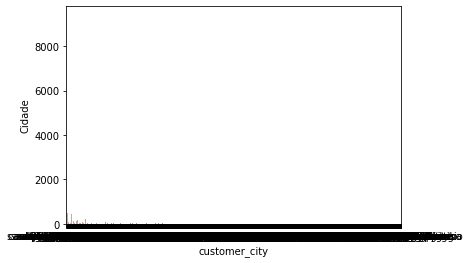

In [68]:
#plotando o gráfico com as informações de review 5 x cidade
sns.countplot(moradia_nota_max['customer_city'])
plt.ylabel('Cidade')

In [79]:
moradia_nota_max.describe()

,customer_zip_code_prefix,review_score,pedido_dia
count,57420.000000,57420.0,57420.000000
mean,34595.183699,5.0,3.738541
std,29950.129124,0.0,1.969471
min,1004.000000,5.0,1.000000
25%,11013.000000,5.0,2.000000
50%,23065.000000,5.0,4.000000
75%,58032.250000,5.0,5.000000
max,99980.000000,5.0,7.000000


Iremos tentar os passos anteriores, agora de outro modo:

In [0]:
df = pd.DataFrame()

In [0]:
score = []

In [0]:
for row in moradia_nota_max['review_score']:
 score.append(row)

In [91]:
pd.Series(score)

0        5
1        5
2        5
3        5
4        5
        ..
57415    5
57416    5
57417    5
57418    5
57419    5
Length: 57420, dtype: int64

In [0]:
df['score'] = score

In [93]:
df.head()

,score
0,5
1,5
2,5
3,5
4,5


In [0]:
city = []

In [0]:
for row in moradia_nota_max['customer_city']:
    city.append(row)

In [96]:
pd.Series(city)

0        sao bernardo do campo
1                    sao paulo
2              mogi das cruzes
3                     campinas
4               jaragua do sul
                 ...          
57415                    marau
57416                rio claro
57417          taboao da serra
57418                   canoas
57419                    cotia
Length: 57420, dtype: object

In [0]:
df['city'] = city

In [98]:
df.head()

,score,city
0,5,sao bernardo do campo
1,5,sao paulo
2,5,mogi das cruzes
3,5,campinas
4,5,jaragua do sul


In [100]:
df.groupby('score')

In [101]:
df['score'].value_counts()

5    57420
Name: score, dtype: int64

In [102]:
df.describe()

,score
count,57420.0
mean,5.0
std,0.0
min,5.0
25%,5.0
50%,5.0
75%,5.0
max,5.0


In [103]:
df['city'].value_counts()

sao paulo                      9324
rio de janeiro                 3812
belo horizonte                 1616
brasilia                       1207
curitiba                        944
                               ... 
vale do sol                       1
santo antonio do descoberto       1
sao valentim                      1
felisburgo                        1
sao benedito do sul               1
Name: city, Length: 3464, dtype: int64

In [105]:
city_score = df[df['score'] > 4]
city_score.shape

(57420, 2)

In [106]:
#aqui verificamos a porcentagem de cidades que contêm maior número de moradores que deram review 5
city_score['city'].value_counts(city_score['score'].sum()/df['score'].mean() ) *100

sao paulo                      16.238245
rio de janeiro                  6.638802
belo horizonte                  2.814350
brasilia                        2.102055
curitiba                        1.644026
                                 ...    
vale do sol                     0.001742
santo antonio do descoberto     0.001742
sao valentim                    0.001742
felisburgo                      0.001742
sao benedito do sul             0.001742
Name: city, Length: 3464, dtype: float64

Pelo que vemos acima, a resposta à pergunta: "onde moram os consumidores que dão as maiores notas de review?", vemos que a maioria se concentra em São Paulo (16%), enquanto que 6% no Rio de Janeiro, e o restante está distribuído.

E se analisarmos por estado?

In [0]:
_merge3[['customer_state', 'review_score']]
nota_max = _merge3['review_score'] == 5
estado = _merge3['customer_state']
estado_nota_max = _merge3[nota_max & estado]

In [117]:
estado_nota_max['customer_state'].value_counts()

SP    25166
RJ     6953
MG     6861
RS     3208
PR     3022
SC     2060
BA     1643
DF     1213
ES     1111
GO     1110
PE      923
CE      673
MT      512
PA      487
MS      430
MA      353
PB      302
RN      280
PI      255
AL      197
SE      177
TO      153
RO      143
AM       89
AC       45
AP       34
RR       20
Name: customer_state, dtype: int64

In [118]:
#deixando em porcentagem
estado_nota_max['customer_state'].value_counts(normalize=True) * 100

SP    43.827935
RJ    12.109021
MG    11.948798
RS     5.586904
PR     5.262975
SC     3.587600
BA     2.861372
DF     2.112504
ES     1.934866
GO     1.933124
PE     1.607454
CE     1.172065
MT     0.891675
PA     0.848137
MS     0.748868
MA     0.614768
PB     0.525949
RN     0.487635
PI     0.444096
AL     0.343086
SE     0.308255
TO     0.266458
RO     0.249042
AM     0.154998
AC     0.078370
AP     0.059213
RR     0.034831
Name: customer_state, dtype: float64

In [120]:
#agora verificando qual era a porcentagem original de consumidores por estado, no total
_merge3['customer_state'].value_counts(normalize=True) * 100

SP    41.967
RJ    12.930
MG    11.706
RS     5.507
PR     5.064
SC     3.651
BA     3.398
DF     2.160
ES     2.043
GO     2.037
PE     1.665
CE     1.339
PA     0.982
MT     0.910
MA     0.751
MS     0.726
PB     0.537
PI     0.496
RN     0.487
AL     0.417
SE     0.350
TO     0.280
RO     0.253
AM     0.149
AC     0.081
AP     0.068
RR     0.046
Name: customer_state, dtype: float64

Alternando a verificação para estado, vemos que se repete o mesmo que com as cidades, as proporções praticamente se mantêm, o que parece indicar não haver relação entre a geolocalização e a nota concedida pelos consumidores.
